# Sched Square

This tutorial includes everything you need to set up decision optimization engines, and build constraint programming models to optimize the Sched Square solution. All data and instructions that you need to model and solve this problem are included.


When you finish this tutorial, you'll have a foundational knowledge of _Prescriptive Analytics_.

>This notebook is part of [Prescriptive Analytics for Python](https://rawgit.com/IBMDecisionOptimization/docplex-doc/master/docs/index.html).

>This notebook requires a valid subscription to [Decision Optimization on Cloud](https://developer.ibm.com/docloud) or a local installation of CPLEX Optimizers.

Some familiarity with Python is recommended.


 ## Table of contents 

-  [Describe the business problem](#Describe-the-business-problem)<br>
-  [How decision optimization (prescriptive analytics) can help](#How--decision-optimization-can-help)<br>
-  [Use decision optimization](#Use-decision-optimization)<br>
    1.  [Download the library](#Download-library)<br>
    2.  [Set up the engines](#Step-2:-Set-up-the-prescriptive-engine)<br>
    3.  [Model the data](#Step-3:-Model-the-data)<br>
    4.  [Set up the prescriptive model](#Step-4:-Set-up-the-prescriptive-model)<br>
        4.1 [Define the decision variables](#Define-the-decision-variables)<br>
        4.2 [Express the business constraints](#Express-the-business-constraints)<br>
        4.3 [Express the search phase](#Express-the-search-phase)<br>
        4.4 [Solve with Decision Optimization solve service](#Solve-with-Decision-Optimization-solve-service)<br>
    5. [Investigate the solution and run an example analysis](#Step-5:-Investigate-the-solution-and-then-run-an-example-analysis)<br>
-  [Summary](#Summary)<br>
****
   

## Describe the business problem

* The aim of this problem is to place a set of small sub-squares into a large englobing square.
* No two sub-squares must be the same.
* All the sub-squares must tile the large square perfectly.

#### References

* See https://en.wikipedia.org/wiki/Squaring_the_square for more details.

## How  decision optimization can help

Prescriptive analytics (decision optimization) technology recommends actions that are based on desired outcomes. It considers specific scenarios, resources, and knowledge of past and current events. With this insight, your organization can make better decisions and have greater control over business outcomes.

Prescriptive analytics is the next step on the path to insight-based actions. It creates value through synergy with predictive analytics, which analyzes data to predict future outcomes. Prescriptive analytics takes that insight to the next level by suggesting the optimal way to handle a future situation. Organizations that act fast in dynamic conditions and make superior decisions in uncertain environments gain a strong competitive advantage.

With prescriptive analytics, you can:

* Automate the complex decisions and trade-offs to better manage your limited resources.
    
* Take advantage of a future opportunity or mitigate a future risk.
    
* Proactively update recommendations based on changing events.
    
* Meet operational goals, increase customer loyalty, prevent threats and fraud, and optimize business processes.


## Use decision optimization

<a id="Download-library"></a>
## 1. Download the DOcplex library

DOcplex is the Decision Optimization CPLEX Modeling library for Python. This library includes two modules, Mathematical Programming Modeling (DOcplex.MP ) and Constraint Programming Modeling (DOcplex.CP).

Run the following cell to install the library. The `real.prefix` in the code is used to detect whether the script is running inside a virtual environment, and adjust the install procedure accordingly.

In [ ]:
!pip install docplex

In [1]:
import docplex.cp

Note that the more global package <i>docplex</i> contains another subpackage <i>docplex.mp</i> that is dedicated to Mathematical Programming, another branch of optimization.

<a id="Step-2:-Set-up-the-prescriptive-engine"></a>
## 2. Set up the prescriptive engine

To access the DOcplexcloud solve service, perform the following steps:

* Subscribe to the [Decision Optimization on Cloud](https://developer.ibm.com/docloud) (DOcplexcloud) service.
* Get the service base URL and personal API key.
* Enter the URL and API key in the cell below, enclosed in quotation marks (""), and run the cell. 

__Note:__ For a persistent setting, create a Python configuration file *docloud_config.py* in a location that is visible to PYTHONPATH.

In [1]:
# Initialize IBM Decision Optimization credentials
SVC_URL = "ENTER YOUR URL HERE" 
SVC_KEY = "ENTER YOUR CREDENTIAL ID HERE"

Import the DOcplex library.

In [17]:
from docplex.cp.model import *

<div class="alert alert-block alert-info"> Note: This notebook requires a full subscription to CPLEX 12.7.1 or above, that is with a valid docplexcloud url and key.</div> 

<a id="Step-3:-Model-the-data"></a>
## 3. Model the data

#### Size of the englobing square

In [18]:
SIZE_SQUARE = 112

#### Sizes of the sub-squares

In [5]:
SIZE_SUBSQUARE = [50, 42, 37, 35, 33, 29, 27, 25, 24, 19, 18, 17, 16, 15, 11, 9, 8, 7, 6, 4, 2]

<a id="Step-4:-Set-up-the-prescriptive-model"></a>
## 4. Set up the prescriptive model

In [6]:
mdl = CpoModel(name="SchedSquare")

<a id="Define-the-decision-variables"></a>
### 4.1 Define the decision variables
##### Create array of variables for sub-squares

In [7]:
x = []
y = []
rx = pulse((0, 0), 0)
ry = pulse((0, 0), 0)

for i in range(len(SIZE_SUBSQUARE)):
    sq = SIZE_SUBSQUARE[i]
    vx = interval_var(size=sq, name="X" + str(i))
    vx.set_end((0, SIZE_SQUARE))
    x.append(vx)
    rx += pulse(vx, sq)

    vy = interval_var(size=sq, name="Y" + str(i))
    vy.set_end((0, SIZE_SQUARE))
    y.append(vy)
    ry += pulse(vy, sq)

<a id="Express-the-business-constraints"></a>
### 4.2 Express the business constraints
##### Create dependencies between variables

In [8]:
for i in range(len(SIZE_SUBSQUARE)):
    for j in range(i):
        mdl.add((end_of(x[i]) <= start_of(x[j]))
                | (end_of(x[j]) <= start_of(x[i]))
                | (end_of(y[i]) <= start_of(y[j]))
                | (end_of(y[j]) <= start_of(y[i])))

##### Set other constraints

In [9]:
mdl.add(always_in(rx, (0, SIZE_SQUARE), SIZE_SQUARE, SIZE_SQUARE))
mdl.add(always_in(ry, (0, SIZE_SQUARE), SIZE_SQUARE, SIZE_SQUARE))

<a id="Express-the-search-phase"></a>
### 4.3 Express the search phase

In [10]:
mdl.set_search_phases([search_phase(x), search_phase(y)])

<a id="Solve-with-Decision-Optimization-solve-service"></a>
### 4.4 Solve with Decision Optimization solve service

In [11]:
msol = mdl.solve(url=SVC_URL, 
                 key=SVC_KEY,
                 TimeLimit=20,
                 LogPeriod=50000)

<a id ="Step-5:-Investigate-the-solution-and-then-run-an-example-analysis"></a>
## 5. Investigate the solution and then run an example analysis

#### Print Solution

In [12]:
print("Solution: ")
msol.print_solution()

Solution: 
-------------------------------------------------------------------------------
Model constraints: 212, variables: integer: 0, interval: 42, sequence: 0
Solve status: Feasible
Solve time: 2.47 sec
-------------------------------------------------------------------------------
X0: (start=0, end=50, size=50, length=50)
X1: (start=70, end=112, size=42, length=42)
X10: (start=52, end=70, size=18, length=18)
X11: (start=35, end=52, size=17, length=17)
X12: (start=59, end=75, size=16, length=16)
X13: (start=35, end=50, size=15, length=15)
X14: (start=35, end=46, size=11, length=11)
X15: (start=50, end=59, size=9, length=9)
X16: (start=27, end=35, size=8, length=8)
X17: (start=52, end=59, size=7, length=7)
X18: (start=46, end=52, size=6, length=6)
X19: (start=75, end=79, size=4, length=4)
X2: (start=75, end=112, size=37, length=37)
X20: (start=50, end=52, size=2, length=2)
X3: (start=0, end=35, size=35, length=35)
X4: (start=79, end=112, size=33, length=33)
X5: (start=50, end=79, s

#### Import graphical tools

In [13]:
import docplex.cp.utils_visu as visu
import matplotlib.pyplot as plt

__Note__: *You can set __POP\_UP\_GRAPHIC=True__ if you prefer a pop up graphic window instead of an inline one.*

In [14]:
POP_UP_GRAPHIC=False

Plotting squares....


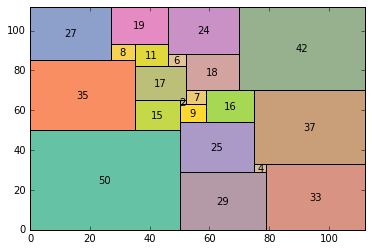

In [15]:
if msol and visu.is_visu_enabled():
    import matplotlib.cm as cm
    from matplotlib.patches import Polygon
    
    if not POP_UP_GRAPHIC:
        %matplotlib inline
    
    # Plot external square
    print("Plotting squares....")
    fig, ax = plt.subplots()
    plt.plot((0, 0), (0, SIZE_SQUARE), (SIZE_SQUARE, SIZE_SQUARE), (SIZE_SQUARE, 0))
    for i in range(len(SIZE_SUBSQUARE)):
        # Display square i
        (sx, sy) = (msol.get_var_solution(x[i]), msol.get_var_solution(y[i]))
        (sx1, sx2, sy1, sy2) = (sx.get_start(), sx.get_end(), sy.get_start(), sy.get_end())
        poly = Polygon([(sx1, sy1), (sx1, sy2), (sx2, sy2), (sx2, sy1)], fc=cm.Set2(float(i) / len(SIZE_SUBSQUARE)))
        ax.add_patch(poly)
        # Display identifier of square i at its center
        ax.text(float(sx1 + sx2) / 2, float(sy1 + sy2) / 2, str(SIZE_SUBSQUARE[i]), ha='center', va='center')
    plt.margins(0)
    plt.show()

## Summary

You learned how to set up and use the IBM Decision Optimization CPLEX Modeling for Python to formulate a Constraint Programming model and solve it with IBM Decision Optimization on the cloud.

##  References
* [CPLEX Modeling for Python documentation](https://rawgit.com/IBMDecisionOptimization/docplex-doc/master/docs/index.html)
* [Decision Optimization on Cloud](https://developer.ibm.com/docloud/)
* [Decision Optimization documentation](https://dataplatform.cloud.ibm.com/docs/content/DO/DOinDSX.html)
* For help with DOcplex, or to report a defect, go [here](https://developer.ibm.com/answers/smartspace/docloud).
* Contact us at dofeedback@wwpdl.vnet.ibm.com

<div class="alert alert-block alert-info"> Note: To save resources and get the best performance please use the code below to stop the kernel before exiting your notebook.</div>

In [ ]:
%%javascript
Jupyter.notebook.session.delete();

Copyright © 2017 IBM. IPLA licensed Sample Materials.